In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The first Tour de France started in 1903, with 110 editions as of 2023 (this notebook contains data up until 2018). As an avid cyclist, this statistic-intensive sport makes this dataset quite enjoyable to work with. I will split this analysis into multiple parts.

- **Part 1: Data Exploration:** this project contains three main datasets:
  1. Historical data: winners for each editions, the pace, distance, etc.
  2. Location data for each stage
  3. Stage-specific data
- **Part 2: Data Visualizations**
- **Part 3: Basic Statistics**
- **Part 4: Machine Learning**

# Part 1 - Data Exploration

## Dataset 1 - Historical TDF guide 

In [4]:
tour_hist_df = pd.read_csv('data/2018_historical_guide.csv')
tour_hist_df.sample(5).T

42        59           81           78          96
Year              1956      1973         1995         1992        2010
Stages              22        20           20           21          20
Started            120       132          189          198         198
Ended               88        87          115          130         170
Distance          4498      4090         3635         3983        3642
Hour               124       122           92          100          91
Minutes              1        25           44           49          58
Seconds             16        34           59           30          48
Pace            36.268    33.407       39.193       39.504      39.594
Winner    R. Walkowiak  L. Ocana  M. Indurain  M. Indurain  A. Schleck
Country            Fra       Esp          Esp          Esp         Lux
Age                 29        28           31           28          25

In [17]:
print('The historical TDF dataset contains ' + str(tour_hist_df.shape[1]) + ' columns and ' + str(tour_hist_df.shape[0]) + ' rows.')

The historical TDF dataset contains 12 columns and 104 rows.


In [27]:
# check for nulls in columns
tour_hist_df.isna().sum()

Year        0
Stages      0
Started     0
Ended       0
Distance    0
Hour        0
Minutes     0
Seconds     0
Pace        0
Winner      0
Country     0
Age         0
dtype: int64

Seems like the data is clean

#### Winner's age throughout the years at the TDF

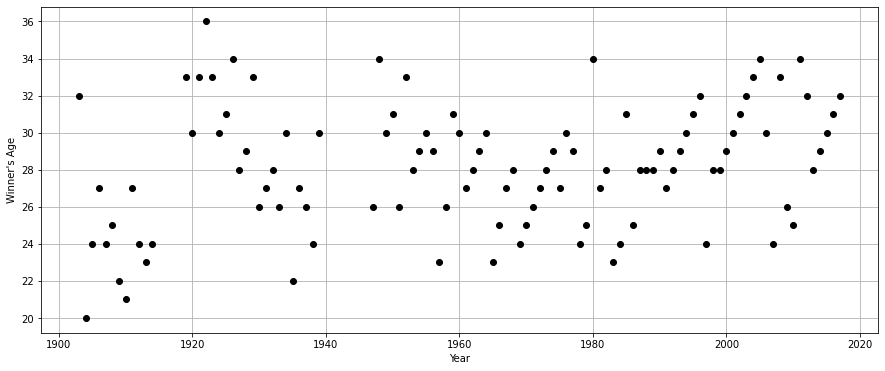

In [101]:
tdf_years = tour_hist_df['Year']
tdf_winner_age = tour_hist_df['Age']

# setup
plt.figure(figsize=(15, 6))

# data
plt.plot(tdf_years, tdf_winner_age, marker='o', linestyle='None', color='black')

#labels
plt.xlabel('Year')
plt.ylabel("Winner's Age")
plt.grid(True)
plt.show()

#### Let's look at a distribution of ages at the TDF through history

In [87]:
unique_ages = pd.Series(tour_hist_df['Age'].unique()).sort_values()
print(unique_ages)

1     20
6     21
5     22
7     23
2     24
4     25
15    26
3     27
13    28
14    29
9     30
11    31
0     32
8     33
12    34
10    36
dtype: int64


<AxesSubplot:ylabel='Frequency'>

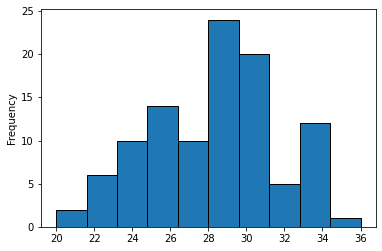

In [69]:
tour_hist_df['Age'].plot(kind='hist', edgecolor='black')

#### Some more statistics on the tour de france winner's age

In [96]:
min_age = min(tour_hist_df['Age'])
max_age = max(tour_hist_df['Age'])
mean_age = np.mean(tour_hist_df['Age'])

print("The average age is " + str(round(mean_age)) + ", while the minimum and maximum are " + str(min_age) + " and " + str(max_age) + ", respectively.")

The average age is 28, while the minimum and maximum are 20 and 36, respectively.


#### Now let's look at the countries with the most wins

Text(0, 0.5, 'Number of wins')

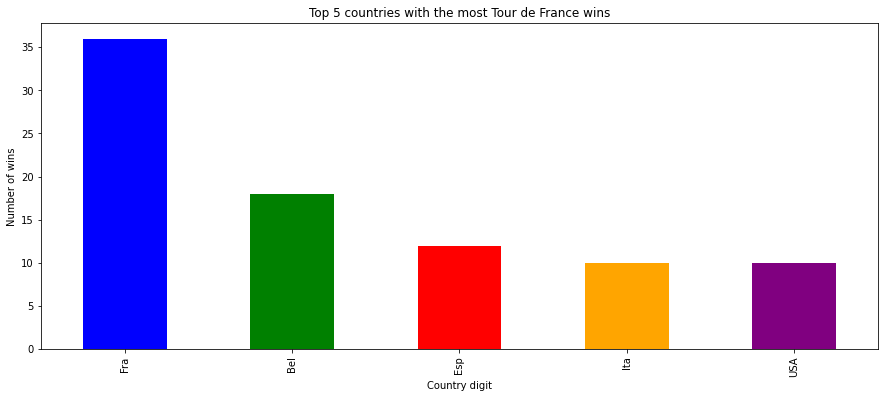

In [95]:
# get top five
top_countries = tour_hist_df['Country'].value_counts().head(5)

plt.figure(figsize=(15,6))
top_countries.plot(kind='bar', color=['blue', 'green', 'red', 'orange', 'purple'])

plt.title("Top 5 countries with the most Tour de France wins")
plt.xlabel("Country digit")
plt.ylabel("Number of wins")

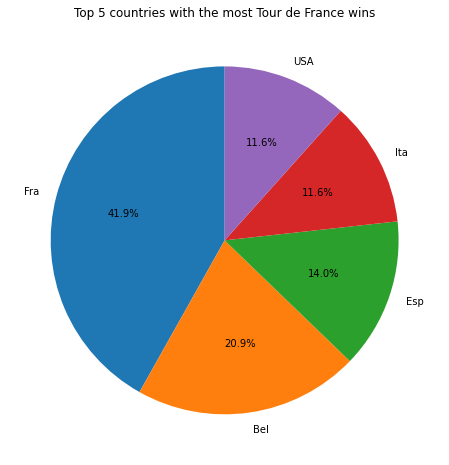

In [94]:
plt.figure(figsize=(8, 8))

plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 countries with the most Tour de France wins")
plt.show()

#### The cycling pace tends to tell a deep story, let's take compare the pace of the winner of each stage.

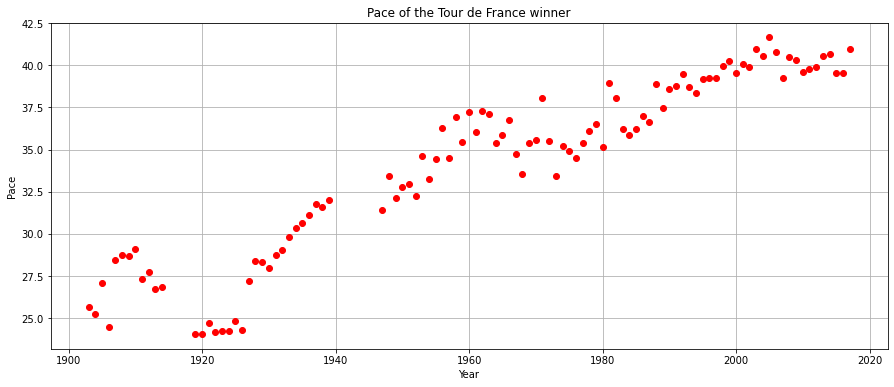

In [100]:
tdf_years = tour_hist_df['Year']
tdf_pace = tour_hist_df['Pace']

# setup
plt.figure(figsize=(15, 6))

# data
plt.plot(tdf_years, tdf_pace, marker='o', linestyle='None', color='red')

#labels
plt.title('Pace of the Tour de France winner')
plt.xlabel('Year')
plt.ylabel("Pace")
plt.grid(True)
plt.show()

## Dataset 2 - TDF Stage Geo Data

In [17]:
geo_stages_df = pd.read_csv('data/unique_stage_geocode.csv')
geo_stages_df.sample(5).T

478                      749       670          682  \
Index         479                      750       671          683   
City    Molenbeek  Belfort/Ballon d�Alsace     Sedan  Piau-Engaly   
lon     4,3303277                6,8463325   4,93863    0,1588887   
lat    50,8522009               47,8226946  49,70349   42,7836595   

                   383  
Index              384  
City   Villers-sur-Mer  
lon          -0,005321  
lat          49,321744

## Dataset 3 - TDF Stages

In [10]:
stages_df = pd.read_csv('data/stages_TDF.csv')
stages_df.sample(5).T

995          1698           969   \
Stage                         2a           5c              4   
Date                    7/2/1973     7/4/1937       7/1/1974   
Distance                    12.4         93.0          184.0   
Origin              Sint-Niklaas  Champagnole     Saint-Malo   
Destination         Sint-Niklaas       Geneva           Caen   
Type             Team time trial  Plain stage    Plain stage   
Winner          Watney–Maes Pils   Leo Amberg  Patrick Sercu   
Winner_Country               NaN          SUI            BEL   

                                  1756             1528  
Stage                                6                3  
Date                         7/10/1935         7/6/1951  
Distance                         207.0            219.0  
Origin                           Evian            Ghent  
Destination              Aix-les-Bains       Le Tréport  
Type            Stage with mountain(s)      Plain stage  
Winner                     René Vietto  Georges Meunier  
Winner_Country                     FRA              FRA